<a href="https://colab.research.google.com/github/Hitendra0165/Zomato-Clustering-and-Sentiment-analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Zomato Restaurant Clustering and Sentiment Analysis**



##### **Project Type**    - Classification

##### **Contribution**    - Individual


# **GitHub Link -**

# **Problem Statement**
##### Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.
India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solves some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Importing important libraries and modules
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
!pip install langdetect
!pip install googletrans
!pip install nltk
import nltk
from langdetect import detect
from googletrans import Translator
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install contractions
!pip install unidecode
import contractions
from unidecode import unidecode
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
nltk.download('all')

plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=1525eabfb905384ec5bfffc1db815b0054e94fc464bfbe6909af02e723484be1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

### Dataset Loading

In [2]:
#let's mount the google drive for import the dtaset
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rest_df = pd.read_csv('/content/drive/MyDrive/PERSONAL PROJECT/zomato sentiment analysis/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/PERSONAL PROJECT/zomato sentiment analysis/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# first five rows of restaurants dataset
rest_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#first five rows of reviews dataset
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [6]:
#Getting the shape of restaurat dataset with rows and columns
rest_df.shape

(105, 6)

In [7]:
#Getting the shape of reviews dataset with rows and columns
reviews_df.shape

(10000, 7)

### Dataset Information

In [8]:
#restaurnts info
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [9]:
#reviews info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

**Why is it important to remove duplicate records from my data?**
* "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.

In [10]:
#Restaurant Dataset Duplicate Value Count
dupliates = len(rest_df[rest_df.duplicated()])
print("There are {} duplicate values in dataset".format(dupliates))

There are 0 duplicate values in dataset


* **In the above Restaurant data after count the duplicate value we came to know that there are no duplicate value present.**

In [11]:
#Reviews Dataset Duplicate Value Count
dupliates = len(reviews_df[reviews_df.duplicated()])
print("There are {} duplicate values in dataset".format(dupliates))

There are 36 duplicate values in dataset


* **In the above Reviews data after count the duplicate value we came to know that there are 36 duplicate value present. So we will remove this duplicate values in further process.**

In [12]:
# sorting by Restaurant name
reviews_df.sort_values('Restaurant',inplace = True)
# dropping duplicate values
reviews_df.drop_duplicates(keep = False,inplace = True)

In [13]:
#Reviews Dataset Duplicate Value Count after removing duplicates
dupliates = len(reviews_df[reviews_df.duplicated()])
print("There are {} duplicate values in dataset".format(dupliates))

There are 0 duplicate values in dataset


- **We have removed all the duplicate values from Reviews data, so there is no need to worry about duplicate values anymore.**

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count of Restaurant Data
print(rest_df.isnull().sum())

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64


- **Around 50% of the data is missing in the categorical column "Collections", which are basically just tags given by zomato for better search results.
As the info here is missing more than 50% so we are going to drop this column**

In [15]:
#drop collections
rest_df.drop('Collections', axis=1, inplace=True)

In [16]:
#Impute one missing timing row with the mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0],inplace=True)

In [17]:
# Missing Values/Null Values Count of Restaurant Data After removing null values
print(rest_df.isnull().sum())

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64


In [18]:
# Missing Values/Null Values Count of Reviews Data
print(reviews_df.isnull().sum())

Restaurant    0
Reviewer      0
Review        7
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


**The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. So it is better to drop the null values in the Review Column**

In [19]:
#dropping null rows in reviews first
reviews_df.dropna(subset = ["Review"], inplace=True)

In [20]:
# Missing Values/Null Values Count of Reviews Data After removing null values
print(reviews_df.isnull().sum())

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


## ***2. Understanding Your Variables***

In [21]:
# Restaurant Dataset Columns
rest_df.columns

Index(['Name', 'Links', 'Cost', 'Cuisines', 'Timings'], dtype='object')

In [22]:
# Reviews Dataset Columns
reviews_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

### Variables Description

#### **Zomato Restaurant names and Metadata**



1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

#### **Zomato Restaurant reviews**


1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

## 3. ***Data Wrangling***

In [23]:
#rating is in object type
reviews_df['Rating'].unique()

array(['4', '5', '3', '1', '2', '3.5', '2.5', '4.5', '1.5', 'Like'],
      dtype=object)

In [24]:
# correcting and changing the datatype
reviews_df['Rating'] = reviews_df['Rating'].replace('Like','4')
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

## ***3. Feature Engineering & Data Pre-processing***
There will be two Data Pre-Processing parts. First is for clustering and second for natural language processing.

### **Part-1**

###  1.Dropping Columns

In [25]:
#function to extract location of the restaurant
def locate(link):
    link_elements = link.split("/")
    return link_elements[3]

#create a location feature
rest_df['Location'] = rest_df['Links'].apply(locate)

In [26]:
rest_df['Location'].value_counts()

hyderabad             104
thetiltbarrepublic      1
Name: Location, dtype: int64

In [27]:
#dropping unnecessary columns
rest_df.drop(['Links','Location'],axis=1,inplace=True)

In [28]:
#let's drop time as it would not be required
reviews_df.drop(['Time'],axis=1,inplace=True)
rest_df.drop('Timings', axis = 1, inplace = True)

**The data in the Time column in Reviews data and Timing column in Restaurant data wasn't in the proper format, and it is not relevant to our clustering process, so we decidedd to drop it.**

###  2.Handling Columns

In [29]:
#splitting to create list instead of strings
rest_df['Cuisines'] = rest_df['Cuisines'].apply(lambda x : x.split(','))

In [30]:
rest_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[Chinese, Continental, Kebab, European, So..."
1,Paradise,800,"[Biryani, North Indian, Chinese]"
2,Flechazo,"1,300","[Asian, Mediterranean, North Indian, Desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[Biryani, North Indian, Chinese, Seafood, ..."
4,Over The Moon Brew Company,"1,200","[Asian, Continental, North Indian, Chinese,..."


In [31]:
#creating a list of all cuisine lists for different restaurants
cuisine_list = []
for i in rest_df.index:
    cuisine_list.append(rest_df['Cuisines'][i])

#creating a flat list (all words)
cuisine_list = [item for sublist in cuisine_list for item in sublist]

In [32]:
#frequency dict
frequency_dict = {}
for item in cuisine_list :
  if item in frequency_dict :
    frequency_dict[item] += 1
  else :
     frequency_dict[item] = 1

#frequency dictionary
print(frequency_dict)


{'Chinese': 7, ' Continental': 17, ' Kebab': 5, ' European': 2, ' South Indian': 7, ' North Indian': 28, 'Biryani': 4, ' Chinese': 36, 'Asian': 5, ' Mediterranean': 4, ' Desserts': 11, ' Seafood': 3, ' Beverages': 5, 'Seafood': 1, ' Goan': 1, ' Asian': 10, 'Healthy Food': 1, 'Lebanese': 1, 'American': 4, 'Ice Cream': 2, 'Street Food': 2, ' Fast Food': 10, 'Mediterranean': 1, ' BBQ': 1, 'Continental': 4, ' American': 2, 'North Indian': 33, ' Italian': 12, ' Finger Food': 1, 'European': 2, 'Burger': 2, ' Biryani': 12, ' Japanese': 2, ' Salad': 5, ' Sushi': 4, 'Mexican': 1, 'Mughlai': 1, 'Fast Food': 5, 'Andhra': 3, 'Bakery': 6, ' Mughlai': 5, ' Juices': 1, 'Arabian': 1, 'Italian': 2, ' Andhra': 3, ' Hyderabadi': 3, 'Cafe': 5, ' Spanish': 1, ' Wraps': 1, 'Finger Food': 1, ' Thai': 2, ' Indonesian': 1, 'South Indian': 2, ' Bakery': 1, 'Modern Indian': 1, 'Desserts': 2, 'Kebab': 1, ' Momos': 3, 'BBQ': 1, ' Modern Indian': 1, ' Burger': 3, 'Momos': 1, ' Pizza': 1, ' Arabian': 1, 'North Easte

It is observable that many of the cuisines are misspelled in terms of an extra space added at the beginning of the string. For example, there are two categories for North Indian food - 'North Indian' and ' North Indian'.

Another point to note is there are various unnecessary categories made. For example, there are 'Chinese' and ' Momos' both in the dataset as different cuisines. Let's try to club and correct them.

In [33]:
#minimising the number of cuisines by sorting and categorizing them out
cuisine_dict = {'Chinese':['Chinese',' Chinese','Momos',' Momos'],
                'North Indian':['North Indian',' North Indian',' BBQ','BBQ','Kebab',' Kebab'],
                'Continental':['Continental',' Continental',' American','American',' BBQ','BBQ','Burger',' Burger','Finger Food',' Finger Food', ' Juices',' Pizza',' Salad',' Wraps'],
                'Andhra':['Andhra',' Andhra'],
                'Arabian':['Arabian',' Arabian'],
                'Asian': ['Asian',' Asian'],
                'Bakery':['Bakery',' Bakery'],
                'Beverages':['Beverages',' Beverages'],
                'Cafe':['Cafe',' Cafe'],
                'Desserts':['Desserts',' Desserts',' Mithai','Ice Cream'],
                'European':['European',' European',' Spanish'],
                'Fast Food':['Fast Food',' Fast Food','Burger',' Burger'],
                'Goan':[' Goan',' Goan'],
                'Hyderabadi':['Hyderabadi',' Hyderabadi',' Biryani','Biryani'],
                'Indonesian':['Indonesian',' Indonesian'],
                'Italian':['Italian',' Italian',' Pizza'],
                'Japanese':['Japanese',' Japanese',' Sushi'],
                'Malaysian':['Malaysian',' Malaysian'],
                'Mediterranean':['Mediterranean',' Mediterranean'],
                'Modern Indian':['Modern Indian',' Modern Indian',' Salad'],
                'Mughlai':['Mughlai',' Mughlai','Kebab',' Kebab'],
                'Seafood':['Seafood',' Seafood'],
                'South Indian':['South Indian',' South Indian'],
                'Thai':['Thai',' Thai'],
                'Healthy Food':['Healthy Food'],
                'Lebanese':['Lebanese'],
                'Mexican':['Mexican'],
                'North Eastern':['North Eastern'],
                'Street Food':['Street Food']}

In [34]:
#Let's make a copy of original data for further process
names_df = rest_df.copy()

In [35]:
#the function returns a list of error free cuisines according to the dictionary that we have created
def cuis_correct(cuisine):
    l = []
    #every cuisine in each row
    for el in cuisine :
      #for each key value pair in cuisine dict
      for key,value in cuisine_dict.items() :
        # if cuisine is correct & matches with one of the unique keys we append to the list and break
        if el == key :
          l.append(key)
          break
        if el in value :
          l.append(key)
    return list(set(l))

In [36]:
#correcting and getting the desired lists as row values for cuisines column
names_df['Cuisines'] = names_df['Cuisines'].apply(cuis_correct)

In [37]:
#let's check the data
names_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[European, Mughlai, North Indian, Continental,..."
1,Paradise,800,"[Chinese, North Indian, Hyderabadi]"
2,Flechazo,"1,300","[Asian, North Indian, Desserts, Mediterranean]"
3,Shah Ghouse Hotel & Restaurant,800,"[North Indian, Hyderabadi, Seafood, Chinese, B..."
4,Over The Moon Brew Company,"1,200","[North Indian, Continental, Asian, Chinese, Me..."


### 3. Adding new Columns


In [38]:
# concatenate new columns with the dataset
names_df = pd.concat([names_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [39]:
for i, row in names_df.iterrows():
  # and for every row we iterate over the new columns only
    for column in list(names_df.columns):
        if column not in ['Name','Cost','Cuisines','Timings']:
        # and check if the column is in the list of cuisines available for that row
            if column in row['Cuisines']:
              #then assign it as 1 else 0
              names_df.loc[i,column] = 1
            else:
                names_df.loc[i,column] = 0

In [40]:
#Let's create a column showing the number of cuisines available in each Restaurant
names_df['Total Cuisines'] = names_df['Cuisines'].apply(lambda x : len(x))

In [41]:
#let's drop cuisine column
names_df.drop('Cuisines',axis = 1, inplace = True)

In [42]:
#Let's Check
names_df.head()

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Mughlai,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines
0,Beyond Flavours,800,1,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,6
1,Paradise,800,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Flechazo,"1,300",0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
3,Shah Ghouse Hotel & Restaurant,800,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,5
4,Over The Moon Brew Company,"1,200",1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5


In [43]:
#let's get average rating for each restaurant
rest_ratings = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index()
rest_ratings.rename(columns={'Restaurant':'Name'},inplace=True)
rest_ratings.sort_values(by = 'Rating').tail(10)

,Name,Rating
19,Cascade - Radisson Hyderabad Hitec City,4.26
16,Beyond Flavours,4.28
64,Over The Moon Brew Company,4.34
97,Zega - Sheraton Hyderabad Hotel,4.45
87,The Indi Grill,4.60
35,Flechazo,4.66
67,Paradise,4.70
2,"3B's - Buddies, Bar & Barbecue",4.76
11,B-Dubs,4.81
3,AB's - Absolute Barbecues,4.88


In [44]:
#adding an average rating feature in restaurant names and metadata dataframe
names_df = names_df.merge(rest_ratings,on='Name',how='left')
names_df.rename(columns={'Rating':'Avg Rating'},inplace=True)
names_df.head(5)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,Seafood,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating
0,Beyond Flavours,800,1,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,6,4.28
1,Paradise,800,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.70
2,Flechazo,"1,300",0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,4,4.66
3,Shah Ghouse Hotel & Restaurant,800,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,5,3.21
4,Over The Moon Brew Company,"1,200",1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,5,4.34


### 4. Changing DataTypes

In [45]:
# info on the final dataset
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    object 
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [46]:
# changing cost datatype
names_df['Cost'] = names_df['Cost'].str.replace(',','')
names_df['Cost'] = names_df['Cost'].astype('int')

In [47]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            105 non-null    object 
 1   Cost            105 non-null    int64  
 2   Chinese         105 non-null    object 
 3   North Indian    105 non-null    object 
 4   Continental     105 non-null    object 
 5   Andhra          105 non-null    object 
 6   Arabian         105 non-null    object 
 7   Asian           105 non-null    object 
 8   Bakery          105 non-null    object 
 9   Beverages       105 non-null    object 
 10  Cafe            105 non-null    object 
 11  Desserts        105 non-null    object 
 12  European        105 non-null    object 
 13  Fast Food       105 non-null    object 
 14  Goan            105 non-null    object 
 15  Hyderabadi      105 non-null    object 
 16  Indonesian      105 non-null    object 
 17  Italian         105 non-null    obj

In [48]:
#five restaurants have not been rated by people yet
names_df['Avg Rating'].fillna(0,inplace=True)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [49]:
# sorting out the best restaurants
best_restaurants = names_df[['Name','Avg Rating','Total Cuisines','Cost']]
best_restaurants = best_restaurants.sort_values(by = 'Avg Rating', ascending= False,ignore_index =True ).head(10)
best_restaurants

,Name,Avg Rating,Total Cuisines,Cost
0,AB's - Absolute Barbecues,4.88,3,1500
1,B-Dubs,4.81,1,1600
2,"3B's - Buddies, Bar & Barbecue",4.76,3,1100
3,Paradise,4.70,3,800
4,Flechazo,4.66,4,1300
5,The Indi Grill,4.60,4,1500
6,Zega - Sheraton Hyderabad Hotel,4.45,2,1750
7,Over The Moon Brew Company,4.34,5,1200
8,Beyond Flavours,4.28,6,800
9,Cascade - Radisson Hyderabad Hitec City,4.26,4,1800


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

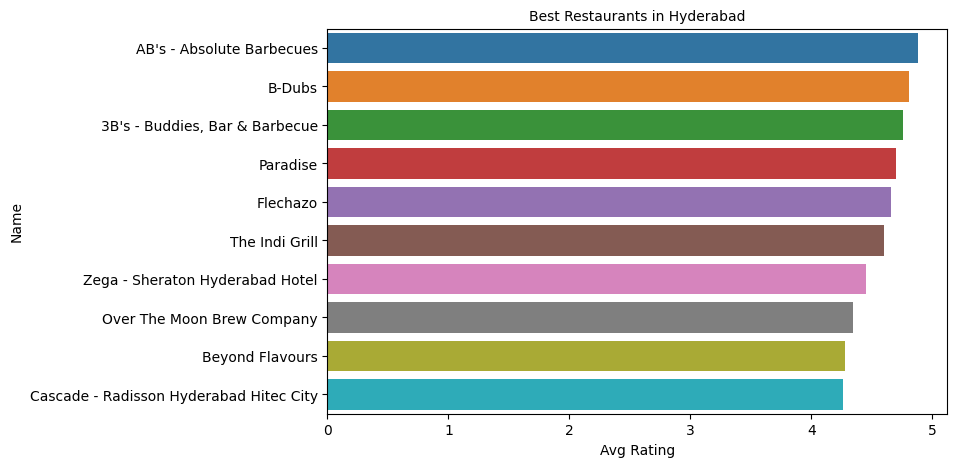

In [50]:
#visualizing the best restaurants
sns.barplot(x='Avg Rating', y='Name',data=best_restaurants)
plt.title('Best Restaurants in Hyderabad',size=10)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

- **All top 10 Restaurants have higher rating than 4. Whereas AB's Absolute Barbecues has the highest rating of 4.88.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Distribution of Average Restaurant Ratings in Hyderabad')

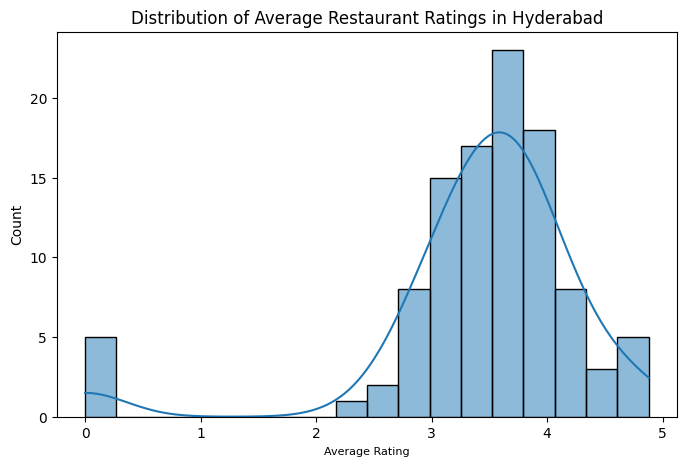

In [51]:
#distribution of Average Ratings in Hyderabad
sns.histplot(x=names_df['Avg Rating'],kde = True)
plt.xlabel('Average Rating',size=8)
plt.title('Distribution of Average Restaurant Ratings in Hyderabad',size=12)

##### 1. Why did you pick the specific chart?

- **A histogram is an excellent tool for visualizing and understanding the probabilistic distribution of numerical data or image data that is intuitively understood by almost everyone. Python has a lot of different options for building and plotting histograms.**


##### 2. What is/are the insight(s) found from the chart?

- **The average rating of Restaurants falls mostly in range of 3 to 4 stars.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [52]:
#Let's create a list of cusines
cusine1 = list(cuisine_dict.keys())
count = [names_df[i].sum() for i in cusine1 ]
#we well create new dataframe
cuisine_count = pd.DataFrame()
cuisine_count['Cusine'] = cusine1
cuisine_count['rest_count'] = count

Text(0.5, 1.0, 'The Most available Cuisines in Hyderabad')

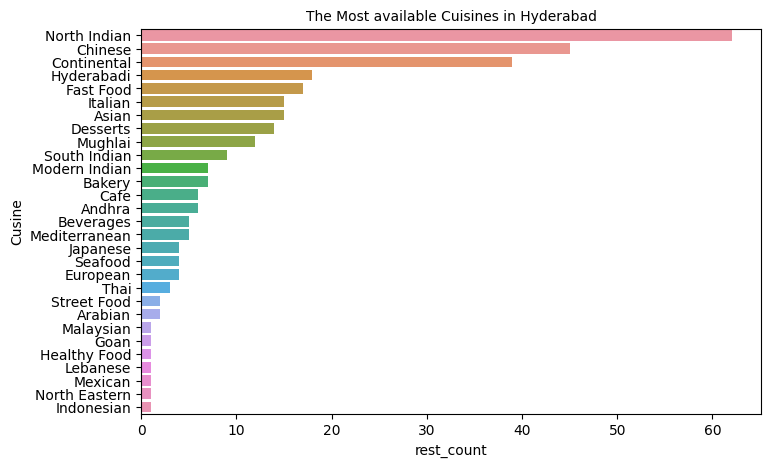

In [53]:
#visualizing cuisines
sns.barplot(x='rest_count', y='Cusine',data=cuisine_count.sort_values('rest_count',ascending = False))
plt.title('The Most available Cuisines in Hyderabad',size=10)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

- North Indian, Chinese and Continental foods are the most available cuisines in the Restaurants.
- Whereas, Indonesian, North-Eastern and Mexican are the least available cuisines in the Restaurants

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

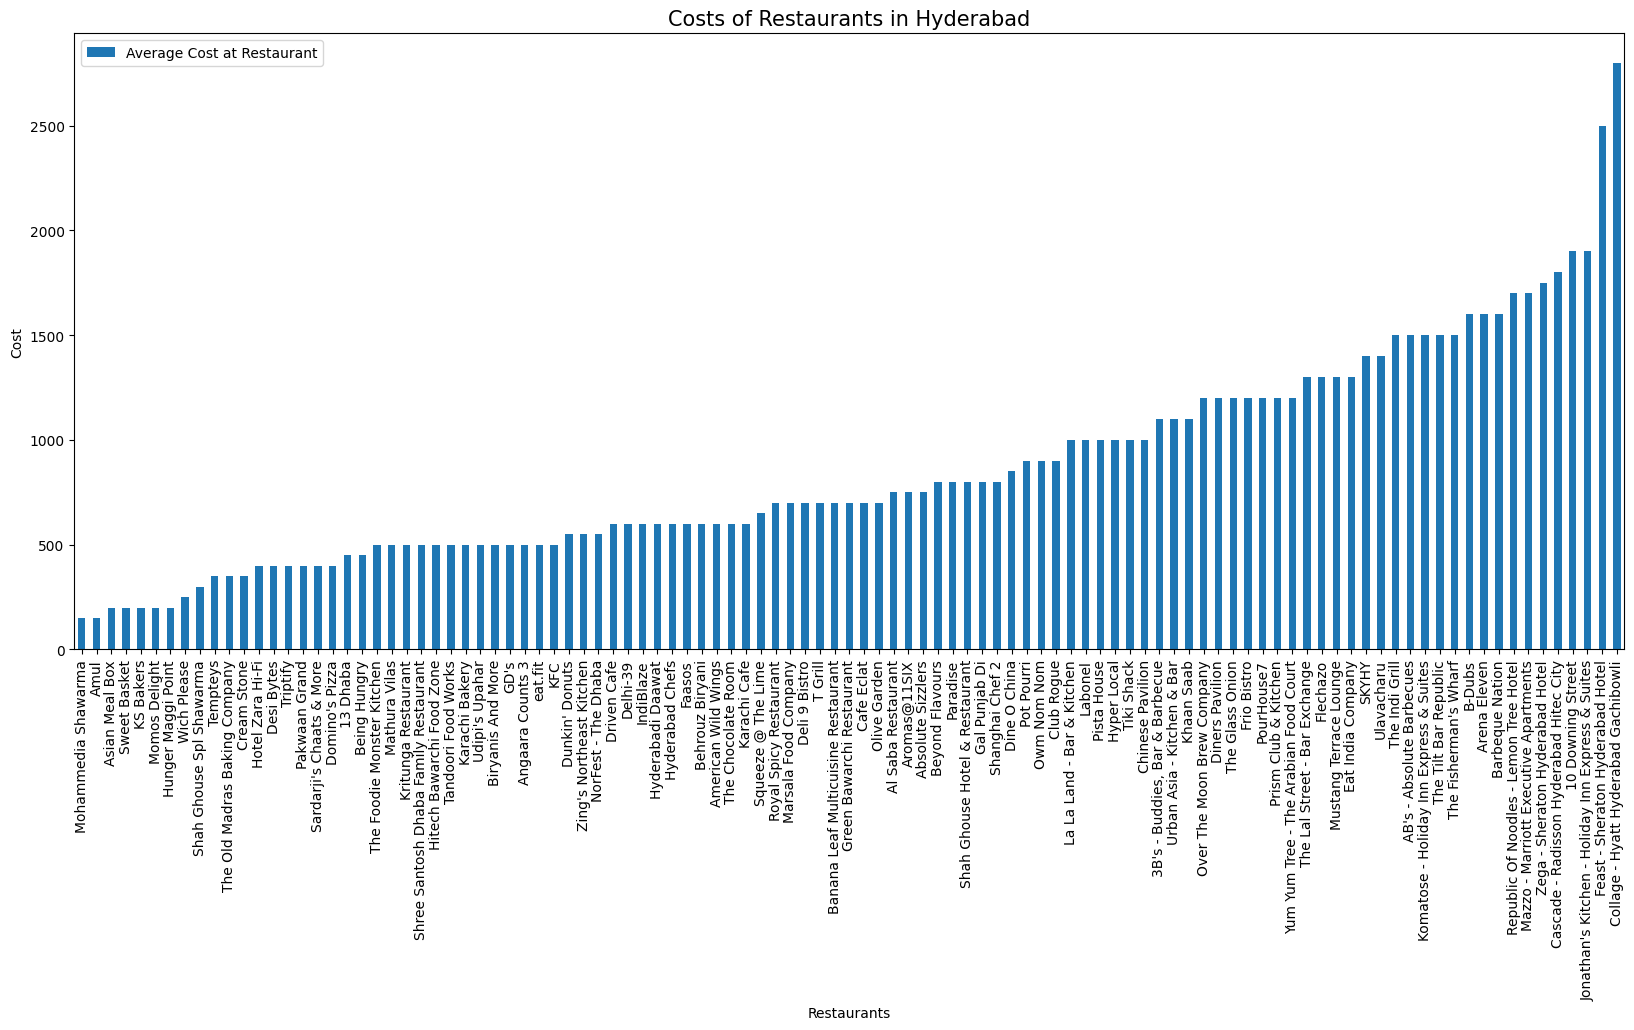

In [54]:
#visualizing Restaurant Costs
names_df.sort_values(['Cost']).plot(x="Name", y=["Cost"], kind="bar", figsize=(20, 8))
plt.xlabel('Restaurants',size=10)
plt.ylabel('Cost',size=10)
plt.title('Costs of Restaurants in Hyderabad',size=15)
plt.legend(['Average Cost at Restaurant'])

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

The highest rate of the restaurant has gone as high as 2800 whereas the lowest rate is low as 150-200.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [55]:
#top 10 costiest restaurants
top10 = names_df[['Name','Cost']].sort_values(['Cost'],ascending = False).head(10)
top10

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

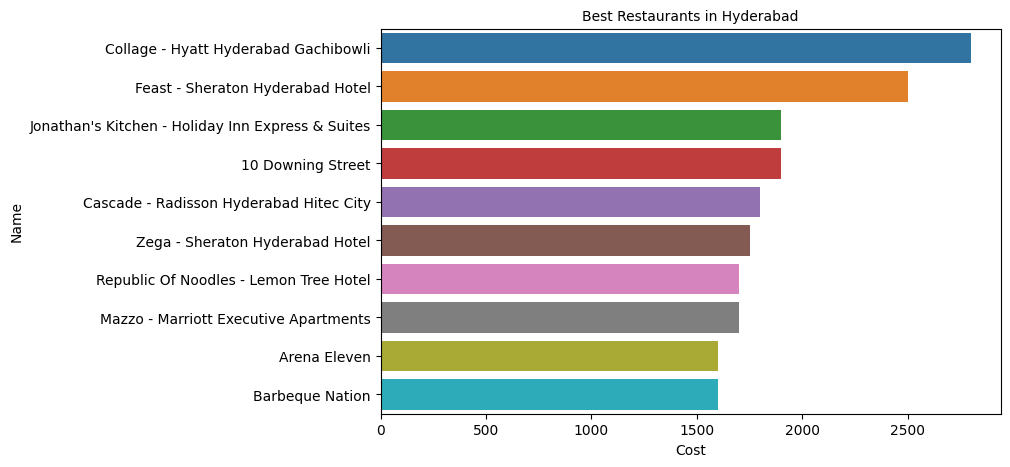

In [56]:
#visualizing the top 10 Restaurants
sns.barplot(x='Cost', y='Name',data=top10)
plt.title('Best Restaurants in Hyderabad',size=10)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

The top 3 costiest restaurants in Hyderabad are -  
1. Collage - Hyatt Hyderabad Gachibowli with cost of 2800 per person
2. Feast - Sheraton Hyderabad Hotel with cost of 2500 per person
3. Jonathan's Kitchen - Holiday Inn Express & Suites with cost of 1900 per person.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In [57]:
#top 10 cheapest restaurants
bottom10 = names_df[['Name','Cost']].sort_values(['Cost']).head(10)
bottom10

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


Text(0.5, 1.0, 'Best Restaurants in Hyderabad')

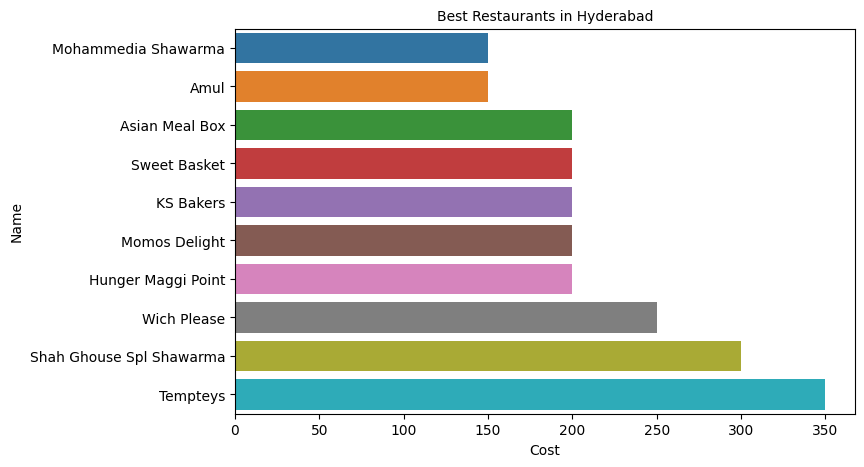

In [58]:
#visualizing the top 10 Restaurants
sns.barplot(x='Cost', y='Name',data=bottom10)
plt.title('Best Restaurants in Hyderabad',size=10)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

##### 2. What is/are the insight(s) found from the chart?

The top 3 Cheapest restaurants in Hyderabad are -  
1. Mohammedia Shawarma with cost of 150 per person
2. Amul with cost of 150 per person
3. Asian Meal Box with cost of 200 per person.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Distribution of Restaurant Costs in Hyderabad')

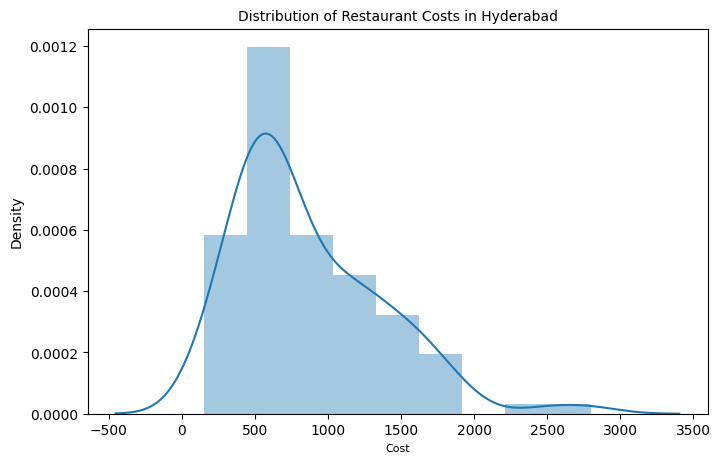

In [59]:
#distribution of Cost in Hyderabad
sns.distplot(x=names_df['Cost'])
plt.xlabel('Cost',size=8)
plt.title('Distribution of Restaurant Costs in Hyderabad',size=10)

##### 1. Why did you pick the specific chart?

- **A histogram is an excellent tool for visualizing and understanding the probabilistic distribution of numerical data or image data that is intuitively understood by almost everyone. Python has a lot of different options for building and plotting histograms.**


##### 2. What is/are the insight(s) found from the chart?

Most of the restaurants fall in the range of 500-1000 INR.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## ***5. ML Model Implementation***

In [60]:
#fitting numerical columns
num_columns = ['Cost','Total Cuisines','Avg Rating']
scaler = MinMaxScaler()
scaler.fit(names_df[num_columns])
scaled_df = names_df.copy()
scaled_df[num_columns] = scaler.transform(names_df[num_columns])

In [61]:
#let's first take two variables only
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(scaled_df[['Cost','Avg Rating']])
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

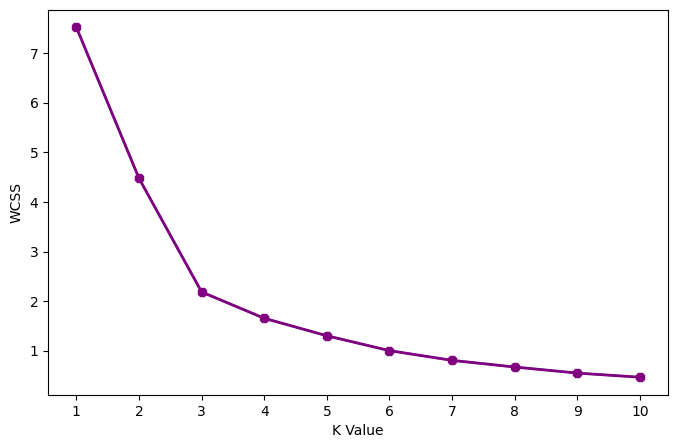

In [62]:
#The elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="purple", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")

The optimal number of clusters here would be 5. It can be clearly observed that after 5 there is minimal drop in WCSS. Let's go ahead and model for 5 clusters.

In [63]:
kmeans_df = scaled_df[['Cost','Avg Rating']]
#fit predict kmeans on 5 clusters
model1 = KMeans(n_clusters=5,random_state= 42)
pred_1 = model1.fit_predict(kmeans_df[['Cost', 'Avg Rating']])
kmeans_df["label"] = pred_1

Text(0.5, 1.0, 'Cost vs Average Rating')

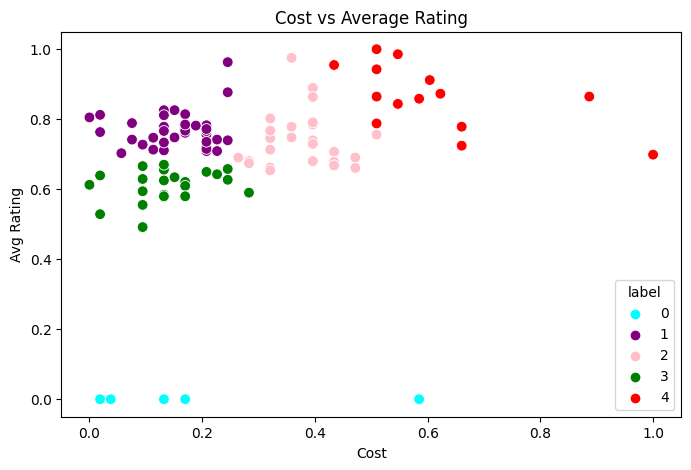

In [64]:
#Scatterplot of the clusters
sns.scatterplot(x = 'Cost',y = 'Avg Rating',hue="label",
                 palette=['cyan','purple','pink','green','red'], legend='full',data = kmeans_df  ,s = 60 )
plt.xlabel('Cost')
plt.ylabel('Avg Rating')
plt.title('Cost vs Average Rating')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The clusters are pretty distinguishable from each other.
Since the input variables were just two, it is easier to distinguish and interpret them.
* Label 0 are those restaurants whose reviews wasn't present.  
* Label 1 are the restaurants whose rating is high and cost is low.
* Label 2 are fine dining restaurants with good ratings and average pricing.
* Label 3 restaurants are small food joints with whose rating is average but cost is very low.
* Label 4 are expensive restaurants that also had above-average ratings.

#### **PCA(Principal Component Analysis)**

In [65]:
#principal component analysis
from sklearn.decomposition import PCA
#choosing 3 components
pca = PCA(n_components=3)
#fitting pca
pca_result = pca.fit_transform(scaled_df.drop("Name",axis = 1))
#variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.20115672 0.16064045 0.08224378]
Cumulative variance explained by 3 principal components: 44.40%


In [66]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,8))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans(random_state = 11)     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(pca_result)          # fit model
    score = silhouette_score(pca_result, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [score]       # store all the scores
    print('Parameter:', p, 'Score', score)
    # check p which has the best score
    if score > best_score:
        best_score = score
        best_grid = p


Parameter: {'n_clusters': 2} Score 0.34255122604151345
Parameter: {'n_clusters': 3} Score 0.4158026480484128
Parameter: {'n_clusters': 4} Score 0.44332661603362133
Parameter: {'n_clusters': 5} Score 0.4590157204300204
Parameter: {'n_clusters': 6} Score 0.5039783564397564
Parameter: {'n_clusters': 7} Score 0.49763224813906304


Text(0.5, 0, 'Number of Clusters')

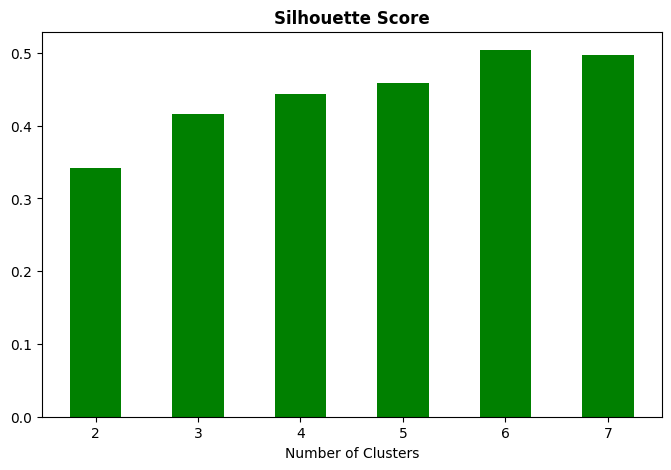

In [67]:
# plotting
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='green', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

In [68]:
# fitting KMeans
kmeans_pca = KMeans(n_clusters=6,random_state=11)
kmeans_pca.fit(pca_result)

KMeans(n_clusters=6, random_state=11)

In [69]:
#fit predict kmeans
kmeans_pca_df = pd.DataFrame(pca_result,columns=['PC1','PC2','PC3'],index=names_df.index)
pred_pca = kmeans_pca.fit_predict(pca_result)
kmeans_pca_df["label"] = pred_pca

Text(0.5, 0, 'PC3')

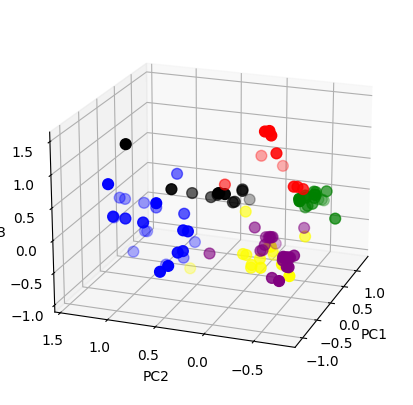

In [70]:
#plotting 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 0], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 0], c='purple', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 1], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 1], c='red', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 2], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 2], c='blue', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 3], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 3], c='green', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 4], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 4], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 4], c='yellow', s=60)
ax.scatter(kmeans_pca_df.PC1[kmeans_pca_df["label"]== 5], kmeans_pca_df.PC2[kmeans_pca_df["label"] == 5], kmeans_pca_df.PC3[kmeans_pca_df["label"] == 5], c='black', s=60)
ax.view_init(20, 200)
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_zlabel('PC3')

In [71]:
#joining the cluster labels to names dataframe
names_df = names_df.join(kmeans_pca_df['label'])
names_df.head(2)

,Name,Cost,Chinese,North Indian,Continental,Andhra,Arabian,Asian,Bakery,Beverages,...,South Indian,Thai,Healthy Food,Lebanese,Mexican,North Eastern,Street Food,Total Cuisines,Avg Rating,label
0,Beyond Flavours,800,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,6,4.28,2
1,Paradise,800,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.70,0


## ***6. Feature Engineering & Data Pre-processing***
There will be two Data Pre-Processing parts. First is for clustering and second for natural language processing.

### **Part-2**

In [72]:
#reviews data
sen_df = reviews_df.copy()
sen_df.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
1801,10 Downing Street,Jayaprakash Reddy,I have visited this pub last weekend with grou...,4.0,"2 Reviews , 11 Followers",0
1828,10 Downing Street,Arun Kalyan,"Had been there for friend's birthday party,it ...",4.0,"5 Reviews , 4 Followers",0
1829,10 Downing Street,Avinash Kavde,Highly recommended place for all the party lov...,5.0,"5 Reviews , 29 Followers",0
1830,10 Downing Street,Manojkumar D Nambisan,"Food is average, service is poor. Can get crow...",3.0,"29 Reviews , 11 Followers",0
1831,10 Downing Street,Harshet Agarwal,Been here through the years\nIt’s been so home...,4.0,"34 Reviews , 36 Followers",0


In [73]:
# ngrams
def get_ngrams(sen_df,ngram_range):
  '''Fucntion to make ngrams'''
  tokens = word_tokenize(sen_df)
  list_of_ngrams = ngrams(tokens,ngram_range)
  final_ngram = []
  for i in list_of_ngrams:
    final_ngram.append(i[0])

  return final_ngram
unigram_list = sen_df.Review.apply(lambda x : get_ngrams(x,1))
unigram_list

1801    [I, have, visited, this, pub, last, weekend, w...
1828    [Had, been, there, for, friend, 's, birthday, ...
1829    [Highly, recommended, place, for, all, the, pa...
1830    [Food, is, average, ,, service, is, poor, ., C...
1831    [Been, here, through, the, years, It, ’, s, be...
                              ...                        
671     [Can, you, explain, ,, how, spicy, food, is, h...
672     [The, food, was, amazingly, delicious, ., I, o...
673     [I, wanted, to, make, my, adjustments, in, my,...
663     [chicken, was, good, .., mix, veg, is, very, s...
600     [I, had, ordered, gobi, methi, paratha, .., it...
Name: Review, Length: 9955, dtype: object

In [74]:
#remove extra spaces, tab
def remove_spaces(sen_df):
    formatted_text = sen_df.replace("\\n"," ").replace("\t",' ')
    return formatted_text

#expand text
def contraction_mapping(sen_df):
    expanded_text = contractions.fix(sen_df)
    return expanded_text

#accented char
def handle_accented(sen_df):
    fixed_text = unidecode(sen_df)
    return fixed_text


#remove negative stopword for sentiment analysis
stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("not")
stopword_list.remove("nor")


#data cleaning
def cleaning_data(sen_df):
    tokens = word_tokenize(sen_df)
    lower_text = [word.lower() for word in tokens]
    text_without_stop = [word for word in lower_text if word not in stopword_list]
    text_without_punct = [word for word in text_without_stop if (word not in punctuation) and (word.isalpha())]
    return text_without_punct

def lemmatization(sen_df):
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for word in sen_df:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_text.append(lemmatized_word)
    return final_text


clean_data = sen_df.Review.apply(remove_spaces)

clean_data = clean_data.apply(contraction_mapping)

clean_data = clean_data.apply(handle_accented)

clean_data = clean_data.apply(cleaning_data)

clean_data = clean_data.apply(lemmatization)

In [75]:
# ngrams
def get_ngrams(data,ngram_range):
    list_of_ngrams = ngrams(data,ngram_range)
    final_ngram = []
    for i in list_of_ngrams:
        final_ngram.append(i[0])

    return final_ngram
unigram_list = clean_data.apply(lambda x : get_ngrams(x,1))
final_unigrams = []
for i in unigram_list :
    final_unigrams.extend(i)

cnt = Counter(final_unigrams).most_common(25)
cnt

[('good', 7123),
 ('food', 6551),
 ('not', 6036),
 ('place', 5976),
 ('service', 3198),
 ('chicken', 3075),
 ('taste', 2404),
 ('ordered', 2169),
 ('time', 2016),
 ('ambience', 2012),
 ('one', 2011),
 ('great', 1962),
 ('really', 1661),
 ('also', 1585),
 ('nice', 1481),
 ('like', 1460),
 ('best', 1441),
 ('restaurant', 1438),
 ('biryani', 1406),
 ('staff', 1391),
 ('visit', 1299),
 ('order', 1299),
 ('try', 1292),
 ('would', 1203),
 ('experience', 1203)]

In [76]:
 # bigrams
def get_ngrams(data,ngram_range):
    list_of_ngrams = ngrams(data,ngram_range)
    final_ngram = []
    for i in list_of_ngrams:
        final_ngram.append(" ".join([i[0],i[1]]))

    return final_ngram
unigram_list = clean_data.apply(lambda x : get_ngrams(x,2))
final_bigrams = []
for i in unigram_list :
    final_bigrams.extend(i)

cnt = Counter(final_bigrams).most_common(25)
cnt

[('main course', 495),
 ('must try', 461),
 ('good food', 455),
 ('food good', 427),
 ('not good', 416),
 ('really good', 394),
 ('good place', 361),
 ('visit place', 336),
 ('good service', 320),
 ('ice cream', 310),
 ('one best', 294),
 ('food not', 256),
 ('service good', 242),
 ('also good', 239),
 ('nice place', 232),
 ('taste good', 229),
 ('best place', 227),
 ('ambience good', 223),
 ('food service', 222),
 ('non veg', 221),
 ('ordered chicken', 211),
 ('must visit', 210),
 ('visited place', 209),
 ('chicken biryani', 205),
 ('not even', 201)]

In [77]:
# Trigrams
def get_ngrams(data,ngram_range):
    list_of_ngrams = ngrams(data,ngram_range)
    final_ngram = []
    for i in list_of_ngrams:
        final_ngram.append(" ".join([i[0],i[1],i[2]]))

    return final_ngram
unigram_list = clean_data.apply(lambda x : get_ngrams(x,3))
final_trigrams = []
for i in unigram_list :
    final_trigrams.extend(i)

cnt = Counter(final_trigrams).most_common(25)
cnt

[('must visit place', 90),
 ('place hangout friend', 73),
 ('veg non veg', 70),
 ('one best place', 70),
 ('north indian food', 62),
 ('food good service', 56),
 ('starter main course', 56),
 ('good place hangout', 52),
 ('overall good experience', 51),
 ('not upto mark', 49),
 ('food really good', 46),
 ('paneer butter masala', 44),
 ('food not good', 42),
 ('good food good', 40),
 ('service also good', 39),
 ('taste not good', 38),
 ('place good food', 38),
 ('non veg starter', 37),
 ('food ambience service', 37),
 ('food not great', 36),
 ('good service good', 35),
 ('ambience good food', 35),
 ('place hang friend', 33),
 ('main course ordered', 33),
 ('would not recommend', 32)]

1. unigrams - domain specific stopwords
2. bigram-trigrams - root causes and you can get some insights about positive and negative reviews

In [78]:
def join_list(data): # count-tfidf needs data in a string format
    return " ".join(data)
clean_data = clean_data.apply(join_list)
clean_data

1801    visited pub last weekend group friend brewed b...
1828    friend birthday party saturday amazing place o...
1829    highly recommended place party lover roof top ...
1830    food average service poor get crowded ambience...
1831    year homely great would happy come every week ...
                              ...                        
671     explain spicy food healthy addition chapati su...
672     food amazingly delicious ordered food online p...
673     wanted make adjustment food habit looking genu...
663               chicken good mix veg sweet small roties
600     ordered gobi methi paratha not good oily not m...
Name: Review, Length: 9955, dtype: object

In [79]:
sen_df.sort_values('Restaurant').sort_index()

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",0
...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",0


In [80]:
sen_df['Review'] = clean_data
sen_df = sen_df.sort_index()
sen_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,"1 Review , 2 Followers",0
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,"3 Reviews , 2 Followers",0
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,"2 Reviews , 3 Followers",0
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincerety go...,5.0,"1 Review , 1 Follower",0
4,Beyond Flavours,Dileep,food ordered kodi drumstick basket mutton biry...,5.0,"3 Reviews , 2 Followers",0


In [81]:
#assigning ratings into positive and negative sentiments i.e. binary problem
sen_df['sentiment'] = sen_df['Rating'].apply(lambda rating : 1 if rating > 3 else 0)

In [82]:
sen_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Pictures,sentiment
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,"1 Review , 2 Followers",0,1
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,"3 Reviews , 2 Followers",0,1
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,"2 Reviews , 3 Followers",0,1
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincerety go...,5.0,"1 Review , 1 Follower",0,1
4,Beyond Flavours,Dileep,food ordered kodi drumstick basket mutton biry...,5.0,"3 Reviews , 2 Followers",0,1


###  Data Splitting

In [83]:
#train test split
X = sen_df['Review']
y = sen_df['sentiment']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [84]:
X

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen da arun great guy behavior sincerety go...
4       food ordered kodi drumstick basket mutton biry...
                              ...                        
9995    madhumathi mahajan well start nice courteous s...
9996    place never disappointed u food courteous staf...
9997    bad rating mainly chicken bone found veg food ...
9998    personally love prefer chinese food couple tim...
9999    checked try delicious chinese food seen lunche...
Name: Review, Length: 9955, dtype: object

## ***7. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Text(0.5, 1.0, 'Number of Positive, Neutral and Negative Sentiments')

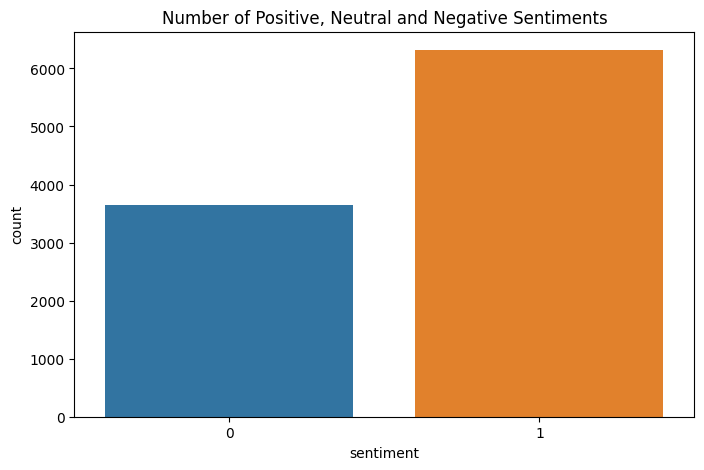

In [85]:
#visualizing number of sentiments
sns.countplot(x=sen_df['sentiment'])
plt.title('Number of Positive, Neutral and Negative Sentiments',size=12)

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

The count of positive reviews is more than that of the negative reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

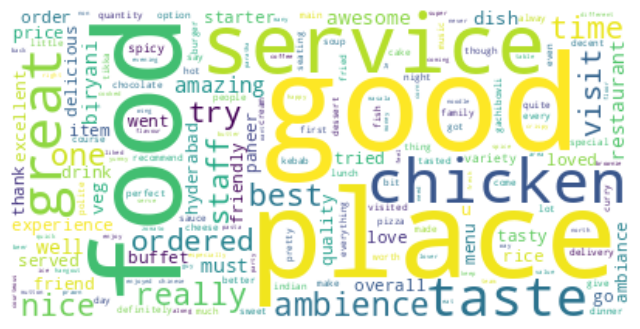

In [86]:
#visualizing Review text
from wordcloud import WordCloud
#separating negative and postive reviews
neg_rev = sen_df[sen_df['sentiment'] == 0]
pos_rev = sen_df[sen_df['sentiment'] == 1]

#Positive wordcloud without removing stopwords
pos_text = " ".join(review for review in pos_rev.Review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white').generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

A Word Cloud is a collection or cluster of words depicted in different sizes. The bigger and bolder the word appears, the more often it is selected/voted for by an audience member. Word Clouds are a powerful way to visualise what your audience really thinks about a topic.

##### 2. What is/are the insight(s) found from the chart?

The most repeated words here are 'Place', 'Good', 'Food', 'Service', etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

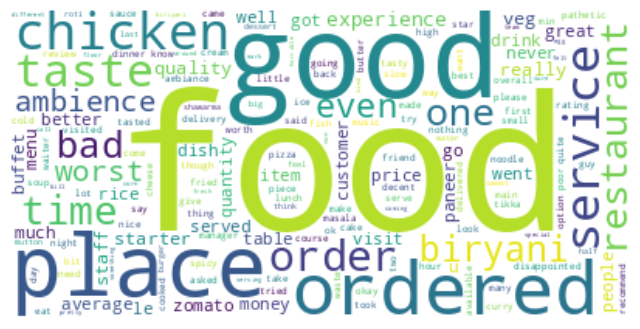

In [87]:
#negative wordcloud without removing stopwords
neg_text = " ".join(review for review in neg_rev.Review)
neg_wordcloud = WordCloud(collocations = False, background_color = 'white').generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

A Word Cloud is a collection or cluster of words depicted in different sizes. The bigger and bolder the word appears, the more often it is selected/voted for by an audience member. Word Clouds are a powerful way to visualise what your audience really thinks about a topic.

##### 2. What is/are the insight(s) found from the chart?

The most repeated words here are 'Place', 'Good', 'Food', 'Service','chicken', 'ordered', etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

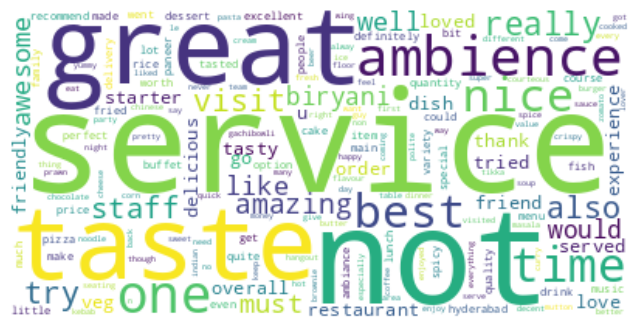

In [88]:
stopword_list.extend(["food","good",'place','chicken','ordered'])
#Positive wordcloud after removing stopwords
pos_text = " ".join(review for review in pos_rev.Review)
pos_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword_list).generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

A Word Cloud is a collection or cluster of words depicted in different sizes. The bigger and bolder the word appears, the more often it is selected/voted for by an audience member. Word Clouds are a powerful way to visualise what your audience really thinks about a topic.

##### 2. What is/are the insight(s) found from the chart?

The most repeated words here are 'Not', 'Great', 'Service', 'Ambience', etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

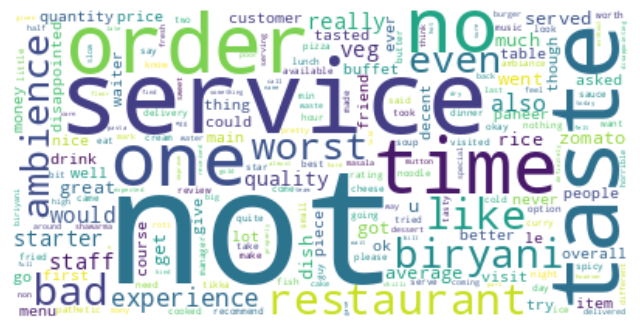

In [89]:
#negative wordcloud after removing stopwords
neg_text = " ".join(review for review in neg_rev.Review)
neg_wordcloud = WordCloud(collocations = False, background_color = 'white',stopwords=stopword_list).generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

A Word Cloud is a collection or cluster of words depicted in different sizes. The bigger and bolder the word appears, the more often it is selected/voted for by an audience member. Word Clouds are a powerful way to visualise what your audience really thinks about a topic.

##### 2. What is/are the insight(s) found from the chart?

The most repeated words here are 'Not', 'Taste', 'Service', 'bad','Restaurant', etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

## ***8. ML Model Implementation***

In [90]:
#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Logistic Regarssion

In [91]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train_vec,y_train)

LogisticRegression()

In [92]:
y_pred_train = logistic.predict(X_train_vec)
y_pred_test = logistic.predict(X_test_vec)

In [93]:
#Training  Data Evaluation for Logistic regression
from sklearn.metrics import *
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[2501  410]
 [ 181 4872]]
********************************************************************************
Accuracy : 0.9257910597689604
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      2911
           1       0.92      0.96      0.94      5053

    accuracy                           0.93      7964
   macro avg       0.93      0.91      0.92      7964
weighted avg       0.93      0.93      0.93      7964



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**So, we are getting the accuracy as 92% for the training dataset, which is quite good, now let's see about the testing data.**

In [94]:
#Testing Data Evaluation for Logistic regression

cnf_matrix = confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test)
print("classification Report:\n",clf_report)


Confusion Matrix :
 [[ 588  140]
 [  79 1184]]
Accuracy : 0.8900050226017077
classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       728
           1       0.89      0.94      0.92      1263

    accuracy                           0.89      1991
   macro avg       0.89      0.87      0.88      1991
weighted avg       0.89      0.89      0.89      1991



**For testing dataset, we are getting accuracy as 89%, which is also a good value, but we will go for the hyperparameter tuning and cross validation to get the better idea.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV
param = [{'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
logi = LogisticRegression()
logi_classifier = RandomizedSearchCV(logi,param, scoring = 'accuracy' , cv = 3)
logi_classifier.fit(X_train_vec,y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions=[{'penalty': ['none', 'elasticnet', 'l1',
                                                     'l2']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
                   scoring='accuracy')

In [96]:
y_pred_train_log = logi_classifier.predict(X_train_vec)
y_pred_test_log = logi_classifier.predict(X_test_vec)

In [97]:
#Training  Data Evaluation for Logistic regression

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train_log)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train_log)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[2501  410]
 [ 181 4872]]
********************************************************************************
Accuracy : 0.9257910597689604
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      2911
           1       0.92      0.96      0.94      5053

    accuracy                           0.93      7964
   macro avg       0.93      0.91      0.92      7964
weighted avg       0.93      0.93      0.93      7964



In [98]:
#Testing Data Evaluation for Logistic regression

cnf_matrix = confusion_matrix(y_test,y_pred_test_log)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_log)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_log)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[ 588  140]
 [  79 1184]]
Accuracy : 0.8900050226017077
classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       728
           1       0.89      0.94      0.92      1263

    accuracy                           0.89      1991
   macro avg       0.89      0.87      0.88      1991
weighted avg       0.89      0.89      0.89      1991



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation.

### Decision Tree

In [99]:
#Let's fit the data into the model
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_vec,y_train)

DecisionTreeClassifier()

In [100]:
#Let's do the prediction on test and train data
y_train_pred_dt = dt_classifier.predict(X_train_vec)
y_pred_test_dt = dt_classifier.predict(X_test_vec)

In [101]:
#Training  Data Evaluation for Decision tree without Hyperparameter Tunning

cnf_matrix = confusion_matrix(y_train,y_train_pred_dt)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_train_pred_dt)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_train_pred_dt)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[2891   20]
 [  17 5036]]
********************************************************************************
Accuracy : 0.9953540934203917
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2911
           1       1.00      1.00      1.00      5053

    accuracy                           1.00      7964
   macro avg       1.00      0.99      0.99      7964
weighted avg       1.00      1.00      1.00      7964



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**We are getting accuracy for decision tree model as 99% for train dataset which is quite good.We will also perform hyperparameter tuning and cross validation to find whether we get better results or not.**

In [102]:
#Testing Data Evaluation for Decision tree without Hyperparameter Tunning

cnf_matrix = confusion_matrix(y_test,y_pred_test_dt)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_dt)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_dt)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[ 554  174]
 [ 194 1069]]
Accuracy : 0.8151682571572074
classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       728
           1       0.86      0.85      0.85      1263

    accuracy                           0.82      1991
   macro avg       0.80      0.80      0.80      1991
weighted avg       0.82      0.82      0.82      1991



**For test data we are getting accuracy as 81% which is less compared to train result. There might be some overfitting issues which we will try to solve using hyperparameter tuning and cross validation.**

### Hyperparameter Tunning and cross-validation.

In [103]:
param = {'criterion' : ['gini','entropy'],
         'splitter' : ['best','random'],
         'max_depth' : np.arange(2,12),
         'min_samples_split': np.arange(2,24),
         'min_samples_leaf' : np.arange(2,24)}
dt_model = DecisionTreeClassifier()
RSCV_dt = RandomizedSearchCV(dt_model,param,scoring='accuracy', cv = 3)
RSCV_dt.fit(X_train_vec,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23]),
                                        'splitter': ['best', 'random']},
                   scoring='accuracy')

In [104]:
print('The best parameters for logistic regression after hyperparameter tuning and cross-validation are : \n',RSCV_dt.best_estimator_)

The best parameters for logistic regression after hyperparameter tuning and cross-validation are : 
 DecisionTreeClassifier(max_depth=11, min_samples_leaf=14, min_samples_split=9)


In [105]:
y_train_pred_dt1 = RSCV_dt.predict(X_train_vec)
y_pred_test_dt2 = RSCV_dt.predict(X_test_vec)

In [106]:
#Training Data evaluation after Hyperparameter Tuning

cnf_matrix = confusion_matrix(y_train,y_train_pred_dt1)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train,y_train_pred_dt1)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_train_pred_dt1)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[1986  925]
 [ 328 4725]]
Accuracy : 0.8426670015067805
classification Report:
               precision    recall  f1-score   support

           0       0.86      0.68      0.76      2911
           1       0.84      0.94      0.88      5053

    accuracy                           0.84      7964
   macro avg       0.85      0.81      0.82      7964
weighted avg       0.84      0.84      0.84      7964



In [107]:
#Testing Data evaluation after Hyperparameter Tuning

cnf_matrix = confusion_matrix(y_test,y_pred_test_dt2)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_dt2)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_dt2)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[ 514  214]
 [ 126 1137]]
Accuracy : 0.8292315419387243
classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       728
           1       0.84      0.90      0.87      1263

    accuracy                           0.83      1991
   macro avg       0.82      0.80      0.81      1991
weighted avg       0.83      0.83      0.83      1991



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement. We have tackled the overfitting is training dataset results.

### Random Forest

In [108]:
#Let's fit the model
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_vec,y_train)

RandomForestClassifier()

In [109]:
#Let's perform predictions
y_pred_train_rf = random_forest.predict(X_train_vec)
y_pred_test_rf = random_forest.predict(X_test_vec)

In [110]:
#Training Data Evaluation without hyperparameter tunning

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train,y_pred_train_rf)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train,y_pred_train_rf)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[2890   21]
 [  16 5037]]
********************************************************************************
Accuracy : 0.9953540934203917
********************************************************************************
classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2911
           1       1.00      1.00      1.00      5053

    accuracy                           1.00      7964
   macro avg       1.00      0.99      0.99      7964
weighted avg       1.00      1.00      1.00      7964



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The accuracy for the training dataset with Random forest classifier is nearly about 99% which is very good value. But we will perform cross-validation and hyperparameter tuning to get the idea about the improvement and also about overfitting condition.**

In [111]:
#Testing Data Evaluation without hyperparameter tunning

cnf_matrix = confusion_matrix(y_test,y_pred_test_rf)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_rf)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_rf)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[ 580  148]
 [  87 1176]]
Accuracy : 0.8819688598694123
classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       728
           1       0.89      0.93      0.91      1263

    accuracy                           0.88      1991
   macro avg       0.88      0.86      0.87      1991
weighted avg       0.88      0.88      0.88      1991



**For testing data it's giving us accuracy of 88% which is also a good value. Let's perform hyperparameter tuning and cross validation for better understanding.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['gini','entropy'],
                    'max_depth':np.arange(3,8),
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'random_state':[11],
                    'oob_score':[True],
                    'max_features':['auto']}
rf_model = RandomForestClassifier()
RSCV_rf_model = RandomizedSearchCV(rf_model,hyperparameters,scoring ='accuracy', cv = 3)
RSCV_rf_model.fit(X_train_vec,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'oob_score': [True],
                                        'random_state': [11]},
                   scoring='accuracy')

In [113]:
print('The best parameters for logistic regression after hyperparameter tuning and cross-validation are : \n',RSCV_rf_model.best_estimator_)

The best parameters for logistic regression after hyperparameter tuning and cross-validation are : 
 RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=9,
                       min_samples_split=12, n_estimators=97, oob_score=True,
                       random_state=11)


In [114]:
y_train_pred_rf1 = RSCV_rf_model.predict(X_train_vec)
y_pred_test_rf2 = RSCV_rf_model.predict(X_test_vec)

In [115]:
#Training Data Evaluation with hyperparameter tunning

cnf_matrix = confusion_matrix(y_train,y_train_pred_rf1)
print("Confusion Matrix :\n",cnf_matrix)


accuracy = accuracy_score(y_train,y_train_pred_rf1)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train,y_train_pred_rf1)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[ 187 2724]
 [   1 5052]]
Accuracy : 0.657835258663988
classification Report:
               precision    recall  f1-score   support

           0       0.99      0.06      0.12      2911
           1       0.65      1.00      0.79      5053

    accuracy                           0.66      7964
   macro avg       0.82      0.53      0.45      7964
weighted avg       0.78      0.66      0.54      7964



In [116]:
#Testing Data Evaluation with hyperparameter tunning

cnf_matrix = confusion_matrix(y_test,y_pred_test_rf2)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test,y_pred_test_rf2)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test,y_pred_test_rf2)
print("classification Report:\n",clf_report)

Confusion Matrix :
 [[  41  687]
 [   0 1263]]
Accuracy : 0.6549472626820693
classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11       728
           1       0.65      1.00      0.79      1263

    accuracy                           0.65      1991
   macro avg       0.82      0.53      0.45      1991
weighted avg       0.78      0.65      0.54      1991



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation.

#**CONCLUSION**

- During our analysis we performed EDA on both numerical and categorical feature. We have dropped various unncessary columns and also added new columns which was very helpful for out clustering process.
- After Analysis we have gathered some info which is given as following ->
1. All top 10 Restaurants have higher rating than 4. Whereas AB's Absolute Barbecues has the highest rating of 4.88.
2. The average rating of Restaurants falls mostly in range of 3 to 4 stars.
3. North Indian, Chinese and Continental foods are the most available cuisines in the Restaurants. Whereas, Indonesian, North-Eastern and Mexican are the least available cuisines in the Restaurants.
4. The top 3 costiest restaurants in Hyderabad are -  
  1. Collage - Hyatt Hyderabad Gachibowli with cost of 2800 per person
  2. Feast - Sheraton Hyderabad Hotel with cost of 2500 per person
  3. Jonathan's Kitchen - Holiday Inn Express & Suites with cost of 1900 per   person.
5. The top 3 Cheapest restaurants in Hyderabad are -  
  1. Mohammedia Shawarma with cost of 150 per person
  2. Amul with cost of 150 per person
  3. Asian Meal Box with cost of 200 per person.
6. Most of the restaurants fall in the range of 500-1000 INR.

We have performed clustering over Cost and Avg Rating of the restuarants. And we have got Following clusters. -
- Label 0 are those restaurants whose reviews wasn't present.  
- Label 1 are the restaurants whose rating is high and cost is low.
- Label 2 are fine dining restaurants with good ratings and average pricing.
- Label 3 restaurants are small food joints with whose rating is average but cost is very low.
- Label 4 are expensive restaurants that also had above-average ratings.

Sentiment Analysis were done on the Reviews and after model implementation we were getting accuracy for train data as 92% and for test data it is 89% using Logistic Regression.
Hence we can deploy this model.  